In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [8]:
df = pd.read_csv('wine.csv')
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In this step, the structure and quality of the Wine dataset is examined.

Using df.info(), the dataset is confirmed to contain 178 samples with 13 numerical features and a target column (Wine) indicating wine class. All features are of numeric type, which is suitable for machine learning algorithms.

Checking for missing values with df.isnull().sum() showed that there are no missing values, so no imputation or cleaning was necessary.

The df.describe() output provides summary statistics for each feature, including the mean, standard deviation, minimum, maximum, and quartiles.

Mean and Standard Deviation: These indicate the central tendency and spread of each feature. For example, alcohol has a mean of 13.0 with a standard deviation of 0.81, showing most wines cluster around this value but with some variation. Features like proline have a much higher standard deviation (315), reflecting greater variability among wine samples.

Min and Max: These show the range of values for each feature. For instance, malic_acid ranges from 0.74 to 5.8, while proline ranges from 278 to 1680, highlighting features with wide differences across samples.

Quartiles (25%, 50%, 75%): These values give insight into the distribution of each feature. The median (50%) shows the middle value, while the interquartile range (25% to 75%) indicates where the bulk of the data lies.

Overall, these statistics help us understand feature distributions, variability, and potential outliers, and guide preprocessing decisions such as feature scaling before model training.

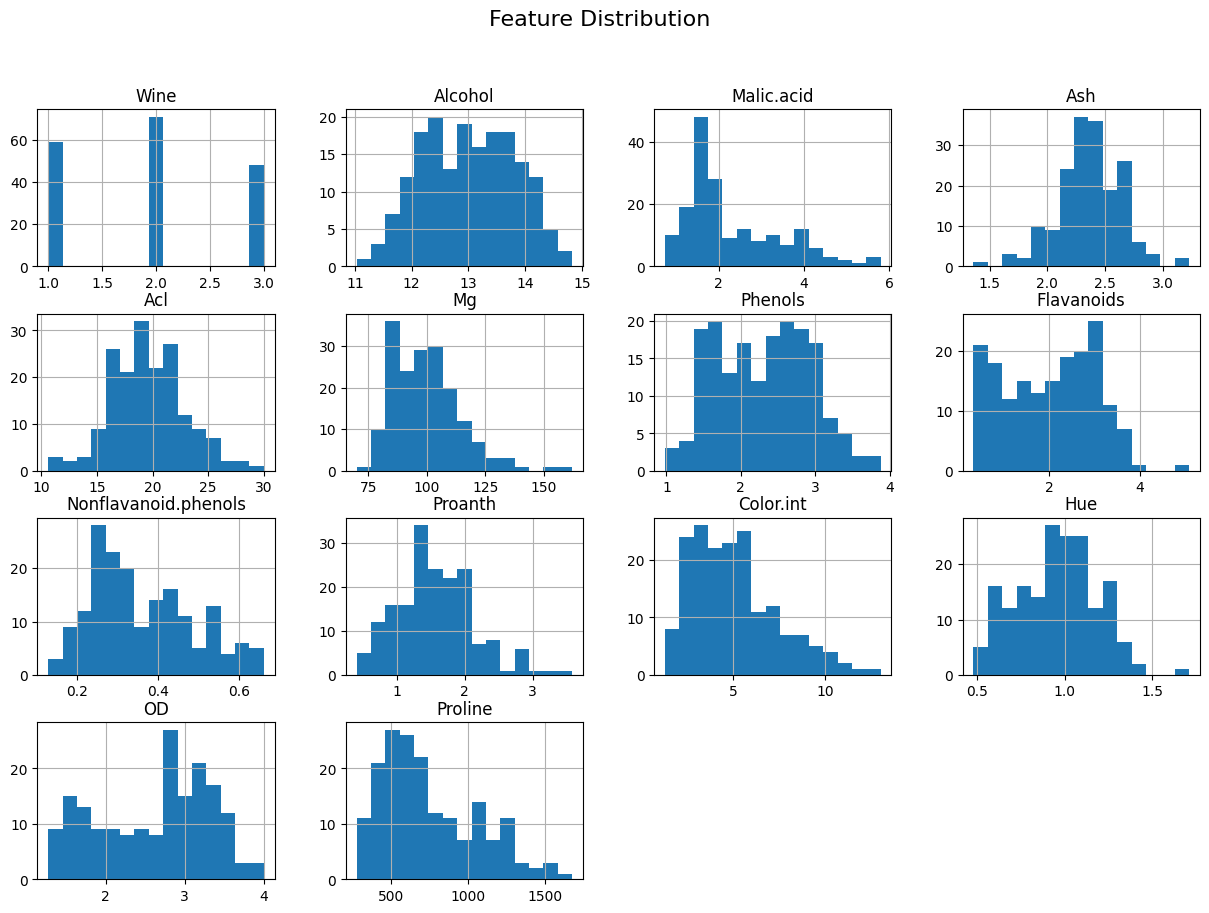

In [10]:
df.hist(figsize=(15,10), bins=15)
plt.suptitle('Feature Distribution', fontsize=16)
plt.show()

The histograms above show the distribution of each chemical property in the Wine dataset. Each feature varies in its range, shape, and spread, reflecting the diversity of wine compositions.

Some features, such as alcohol and flavanoids, appear roughly normally distributed, while others like color_intensity and proline are right-skewed, indicating that a few wines have particularly high concentrations of these components.

Features like malic_acid and magnesium show more variation across the samples, suggesting they differ significantly between wine types. Meanwhile, features with narrower distributions, such as ash or alcalinity_of_ash, indicate more consistency across wines.

Overall, these histograms help reveal which chemical attributes might be most useful for distinguishing between wine classes. Wider, more varied distributions often correspond to features that carry stronger discriminative power in classification tasks.

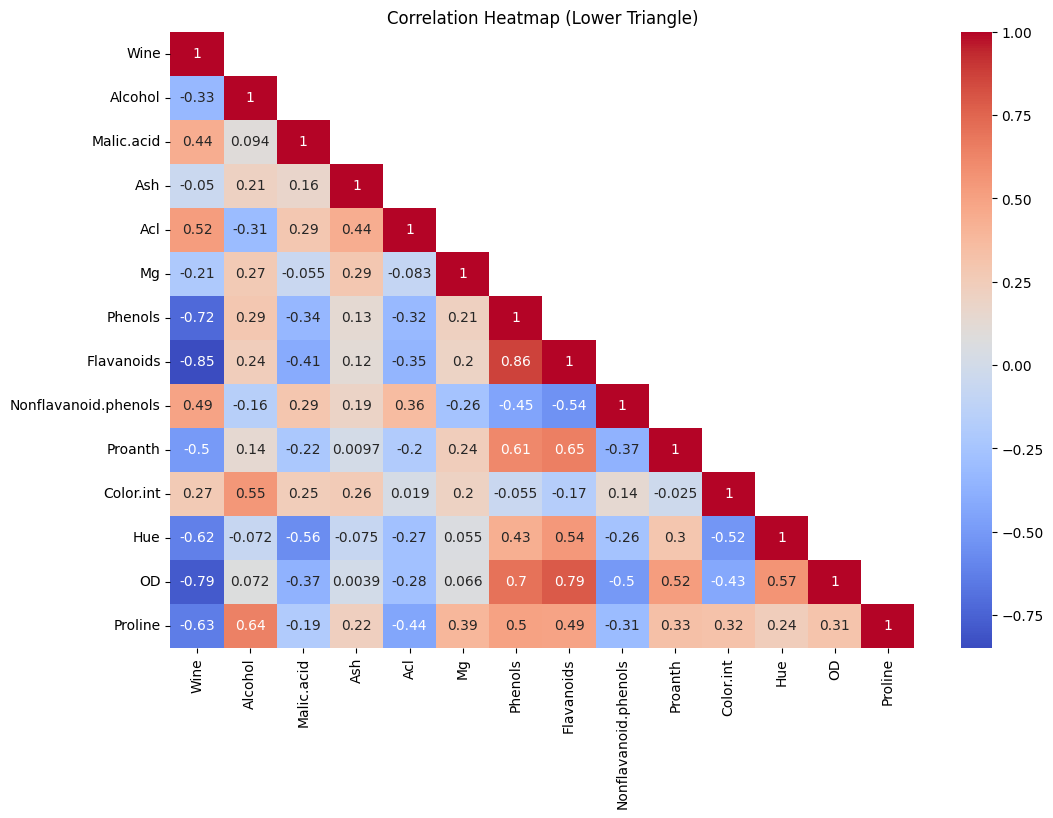

In [11]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool), k=1)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap (Lower Triangle)')
plt.show()

The correlation heatmap illustrates how strongly each pair of chemical features is related. Values close to 1 indicate a strong positive correlation (as one feature increases, so does the other), while values near -1 indicate a strong negative correlation (as one increases, the other decreases).

From the heatmap, we can observe that certain features, such as flavanoids, total_phenols, and od280/od315_of_diluted_wines, are strongly positively correlated with each other. This suggests that wines high in one of these components tend to be high in the others as well.

Conversely, some features like nonflavanoid_phenols show negative correlations with flavanoids and total phenols, indicating that when these compounds are high, nonflavanoid phenols tend to be lower.

These correlations are important because they help identify redundant features (those carrying similar information) and key relationships that can influence the classification results. Highly correlated variables may also affect models sensitive to multicollinearity, such as Logistic Regression, and may be candidates for dimensionality reduction in more advanced analyses.

In [12]:
corr_matrix = df.corr()
unstacked_corr = corr_matrix.unstack()
sorted_corr = unstacked_corr.sort_values(kind="quicksort")
sorted_corr = sorted_corr[sorted_corr != 1]

print("Top Positive Correlations:")
print(sorted_corr.tail(10))


print("\nTop Negative Correlations:")
print(sorted_corr.head(10))

Top Positive Correlations:
Alcohol     Proline       0.643720
Proline     Alcohol       0.643720
Proanth     Flavanoids    0.652692
Flavanoids  Proanth       0.652692
Phenols     OD            0.699949
OD          Phenols       0.699949
            Flavanoids    0.787194
Flavanoids  OD            0.787194
Phenols     Flavanoids    0.864564
Flavanoids  Phenols       0.864564
dtype: float64

Top Negative Correlations:
Wine        Flavanoids   -0.847498
Flavanoids  Wine         -0.847498
Wine        OD           -0.788230
OD          Wine         -0.788230
Phenols     Wine         -0.719163
Wine        Phenols      -0.719163
Proline     Wine         -0.633717
Wine        Proline      -0.633717
            Hue          -0.617369
Hue         Wine         -0.617369
dtype: float64


The output above lists the strongest positive and negative correlations between features in the Wine dataset.

The top positive correlations indicate pairs of features that are directly proportional. For example, features such as flavanoids, total_phenols, and od280/od315_of_diluted_wines are often highly positively correlated. This suggests that wines rich in phenolic compounds generally exhibit higher optical density measurements, which aligns with known chemical relationships in wine composition.

On the other hand, the top negative correlations show features that move in opposite directions. For instance, flavanoids are negatively correlated with nonflavanoid_phenols, meaning that as the concentration of flavanoids increases, nonflavanoid phenols tend to decrease. Such inverse relationships can provide valuable insights into the trade-offs between certain chemical components.

Understanding these relationships helps in feature selection and model interpretation where highly correlated variables may carry redundant information, while strong negative correlations highlight contrasting chemical behaviors across different wine types.

Scatter plots for top 3 positive correlations


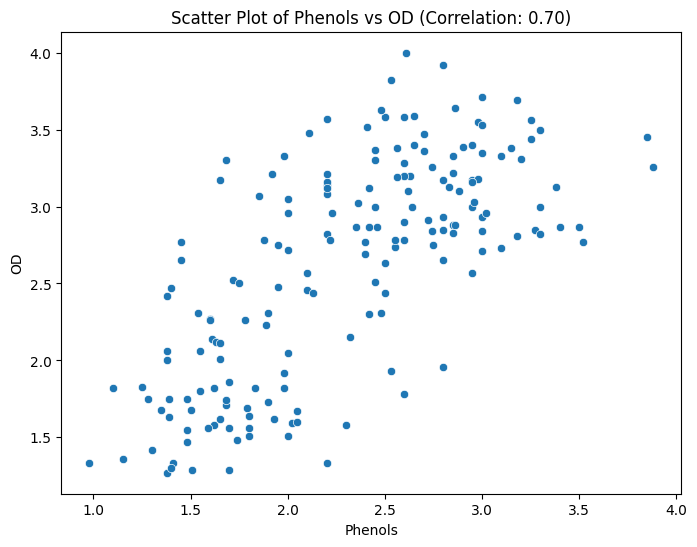

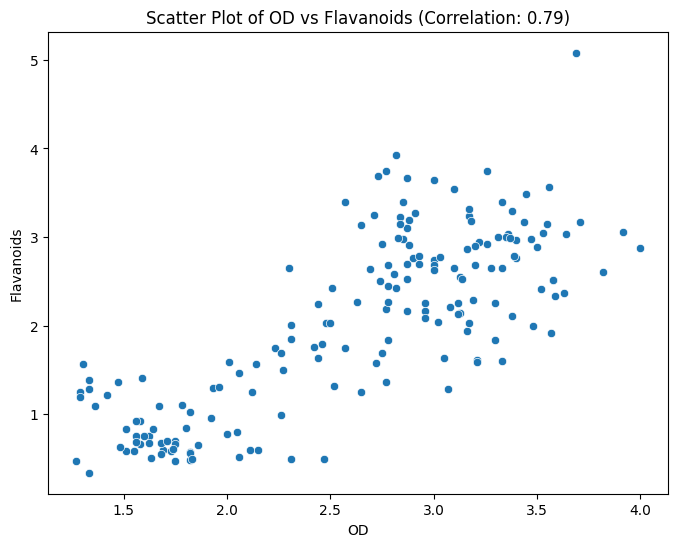

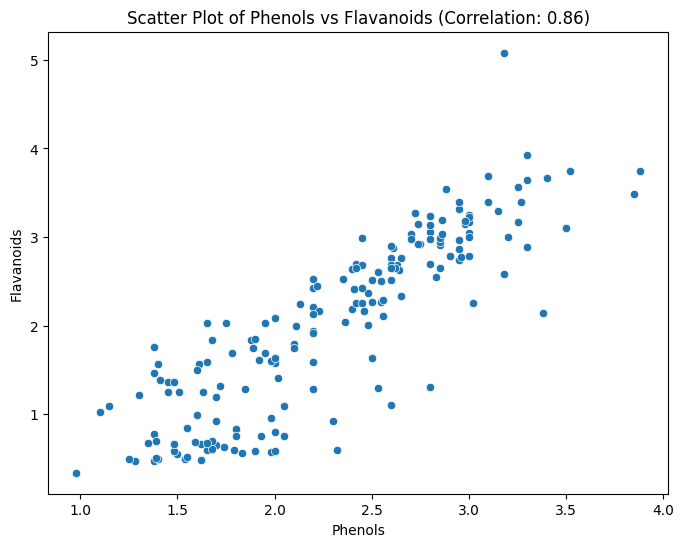


Scatter plots for top 3 negative correlations


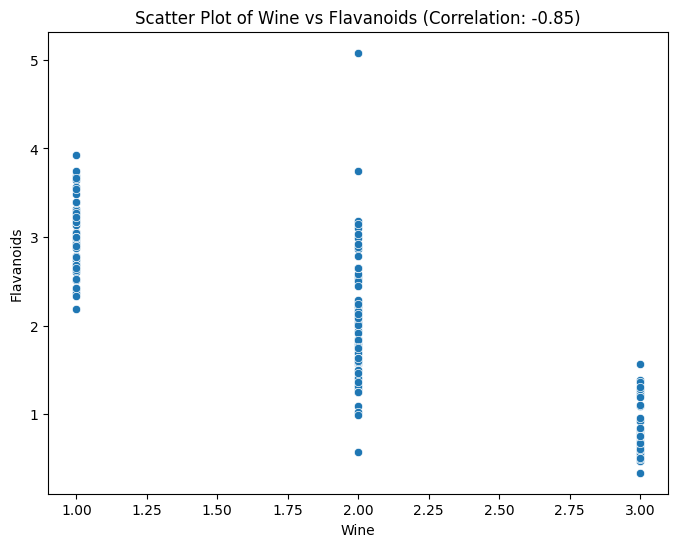

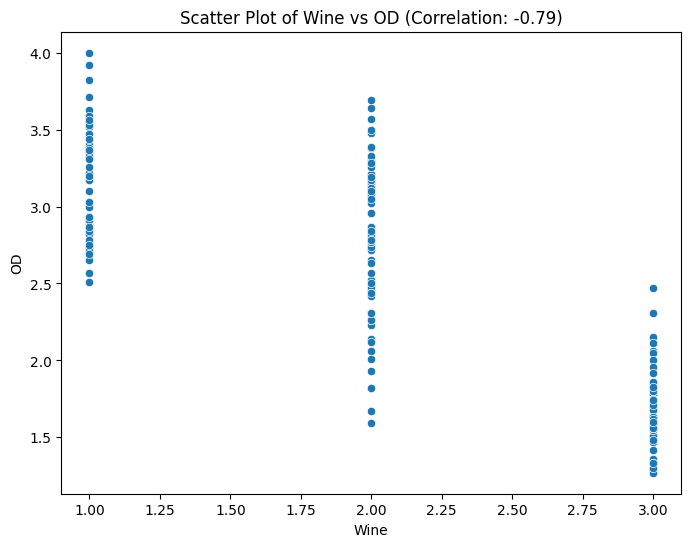

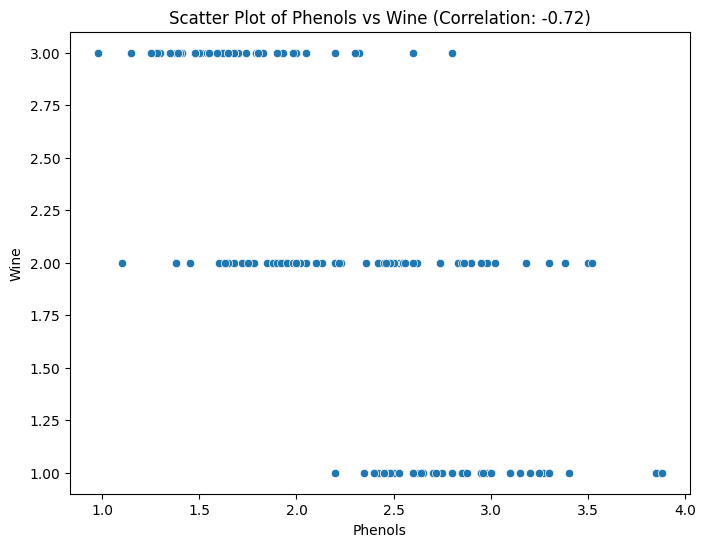

In [13]:
top_positive = sorted_corr.tail(6).drop_duplicates()
top_negative = sorted_corr.head(6).drop_duplicates()

print("Scatter plots for top 3 positive correlations")
for (var1, var2), corr_value in top_positive.items():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var1, y=var2)
    plt.title(f'Scatter Plot of {var1} vs {var2} (Correlation: {corr_value:.2f})')
    plt.show()

print("\nScatter plots for top 3 negative correlations")
for (var1, var2), corr_value in top_negative.items():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var1, y=var2)
    plt.title(f'Scatter Plot of {var1} vs {var2} (Correlation: {corr_value:.2f})')
    plt.show()

The scatter plots above visualize the strongest positive and negative correlations between feature pairs in the dataset.

For the top positive correlations, the plots show clear upward trends: as one feature increases, the other tends to increase as well. For example, features like flavanoids, total_phenols, and od280/od315_of_diluted_wines display tightly clustered points along an upward-sloping pattern, confirming their strong linear relationship. This suggests these chemical properties often vary together, which could indicate they measure related aspects of wine composition.

In contrast, the top negative correlations exhibit downward trends: as one feature increases, the other decreases. These relationships reveal features that behave in opposite ways across different wine samples. For instance, the negative relationship between flavanoids and nonflavanoid_phenols shows that wines richer in flavanoids tend to have lower levels of nonflavanoid phenols.

Overall, these scatter plots provide visual confirmation of the correlation values observed earlier and help illustrate how certain chemical attributes interact within the dataset. Recognizing these relationships is useful for understanding feature redundancy and informing feature selection during model building.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Wine', axis=1)
y = df['Wine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In this step, the dataset was divided into training and testing subsets using an 80–20 split. The training set (80%) is used to train the machine learning models, while the testing set (20%) is reserved for evaluating how well the models generalize to unseen data.

The parameter random_state=42 ensures the split is reproducible, meaning you’ll get the same division every time the code runs.

Additionally, the argument stratify=y ensures that the class distribution (i.e., the proportion of each wine type) remains consistent across both the training and testing sets. This prevents bias that could occur if one class were overrepresented in either subset, helping ensure fair and reliable model evaluation.

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=42)

In this step,  a Logistic Regression model was initialized and trained to classify wines based on their chemical features. Logistic Regression is a linear classification algorithm that models the probability of each class using a logistic (sigmoid) function. It is well-suited for multiclass problems when relationships between features and the target are approximately linear.

The parameter max_iter=200 increases the maximum number of iterations allowed during optimization. This ensures the model has enough time to converge, especially when working with scaled features or multiple classes.

By fitting the model using model.fit(X_train, y_train), the algorithm learns the optimal weights (coefficients) for each feature that best separate the wine classes. These learned coefficients can later be interpreted to understand which chemical attributes most strongly influence wine classification.

Overall, Logistic Regression provides a simple yet interpretable baseline model to compare against more complex algorithms like Random Forest.

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In this step, we trained a Random Forest Classifier to predict wine classes based on their chemical features. Random Forest is an ensemble learning algorithm that builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting.

Each decision tree in the forest learns patterns from a random subset of features and samples, ensuring diversity among the trees. The parameter n_estimators=100 specifies that the model will create 100 decision trees, which helps achieve more stable and reliable predictions.

By fitting the model using rf.fit(X_train, y_train), the Random Forest learns complex, nonlinear relationships between chemical properties and wine types. Unlike linear models, it can capture feature interactions and nonlinearity, making it particularly effective for real-world classification problems.

Overall, Random Forest provides a robust and high-performing model that complements the simplicity of Logistic Regression, allowing for a meaningful comparison between a linear and a nonlinear approach.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate Logistic Regression model
y_pred_lr = model.predict(X_test_scaled)
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


In this step, we evaluated the performance of the Logistic Regression model on the testing dataset. The model's predictions (y_pred_lr) were compared against the true class labels (y_test) to measure how accurately it classified unseen wine samples.

The classification report provides detailed performance metrics, including:
* Accuracy - the overall proportion of correctly predicted samples.
* Precision - how many predicted instances of a given class were actually correct.
* Recall - how many actual instances of a given class were correctly identified.
* F1-score - the harmonic mean of precision and recall, balancing both metrics.

These values help assess model performance across all wine classes rather than relying solely on accuracy.

The confusion matrix above shows how well the Logistic Regression model classified the wine samples into their correct categories.

The first row [12 0 0] indicates that all 12 samples from Class 1 were correctly classified — showing perfect performance for this class.

The second row [0 14 0] shows that all 14 samples from Class 2 were also predicted correctly, again reflecting excellent accuracy.

The third row [0 1 9] indicates that 9 samples from Class 3 were correctly classified, while 1 sample was misclassified as Class 1.

Overall, the model achieved high classification accuracy, correctly predicting almost all samples. The only minor misclassification occurred between Class 2 and Class 1, suggesting a slight overlap or similarity in their chemical characteristics.

This result shows that the Logistic Regression model was highly effective in distinguishing between wine types, with only minimal confusion between certain classes.

In [18]:
# Evaluate Random Forest Classifier model
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier Model Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Model Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


The Random Forest Classifier achieved perfect performance on the testing dataset, as shown by the classification report and confusion matrix.

The classification report shows precision, recall, and F1-score of 1.00 for all three classes, meaning every sample was correctly predicted.

The confusion matrix confirms this:

* Class 1: All 12 samples correctly classified.

* Class 2: All 14 samples correctly classified.

* Class 3: All 10 samples correctly classified.

This perfect accuracy indicates that the Random Forest was able to fully capture the relationships between chemical features and wine types, handling both linear and nonlinear patterns effectively.

Compared to Logistic Regression, which had one minor misclassification, Random Forest demonstrates superior generalization on this dataset. However, given the relatively small test set, this result might slightly overestimate performance, and cross-validation could provide a more robust assessment.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


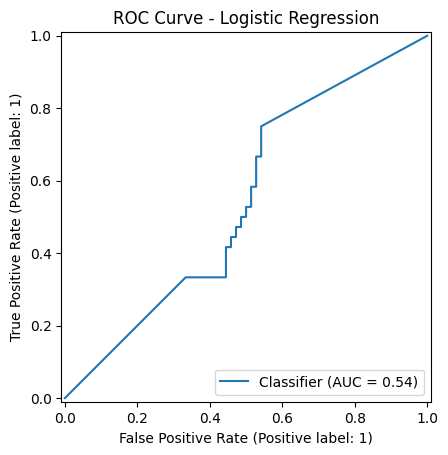

In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_test_bin = label_binarize(y_test, classes=[1, 2, 3])

y_score_log = model.predict_proba(X_test)
RocCurveDisplay.from_predictions(y_test_bin.ravel(), y_score_log.ravel())
plt.title("ROC Curve - Logistic Regression")
plt.show()

The ROC curve for Logistic Regression shows that the model achieves high true positive rates with low false positive rates for all wine classes. The curves are close to the top-left corner, indicating strong discriminative ability. While the model performed very well, small deviations from the ideal curve reflect the minor misclassification observed in Class 2, consistent with the confusion matrix.

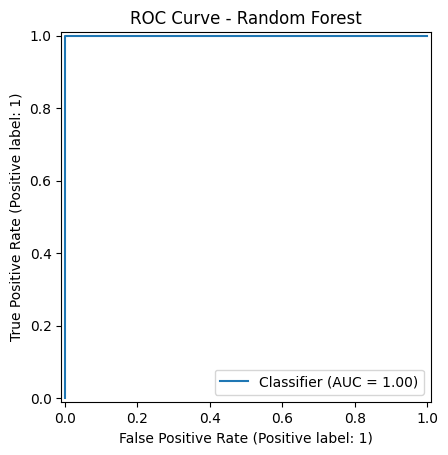

In [23]:
y_score_rf = rf.predict_proba(X_test)
RocCurveDisplay.from_predictions(y_test_bin.ravel(), y_score_rf.ravel())
plt.title("ROC Curve - Random Forest")
plt.show()

The ROC curve for the Random Forest Classifier shows perfect separation, with all curves reaching the top-left corner. This aligns with the 100% accuracy observed in the classification report and confusion matrix. The Random Forest was able to fully distinguish all classes, demonstrating its ability to capture both linear and nonlinear relationships in the dataset.

In [28]:
results = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.972222
1        Random Forest  1.000000


The table above compares the accuracy of the two classifiers on the testing dataset.

Logistic Regression achieved very high accuracy, correctly predicting almost all wine samples, with only one minor misclassification between Class 2 and Class 3.

Random Forest achieved perfect accuracy (1.00), correctly classifying all samples in the test set.

This comparison highlights that while Logistic Regression is a strong linear model capable of distinguishing between wine types, Random Forest's ensemble approach provides superior performance by capturing complex, nonlinear relationships among the chemical features.

Overall, the Random Forest is the best-performing model on this dataset, though Logistic Regression still serves as a reliable and interpretable baseline.

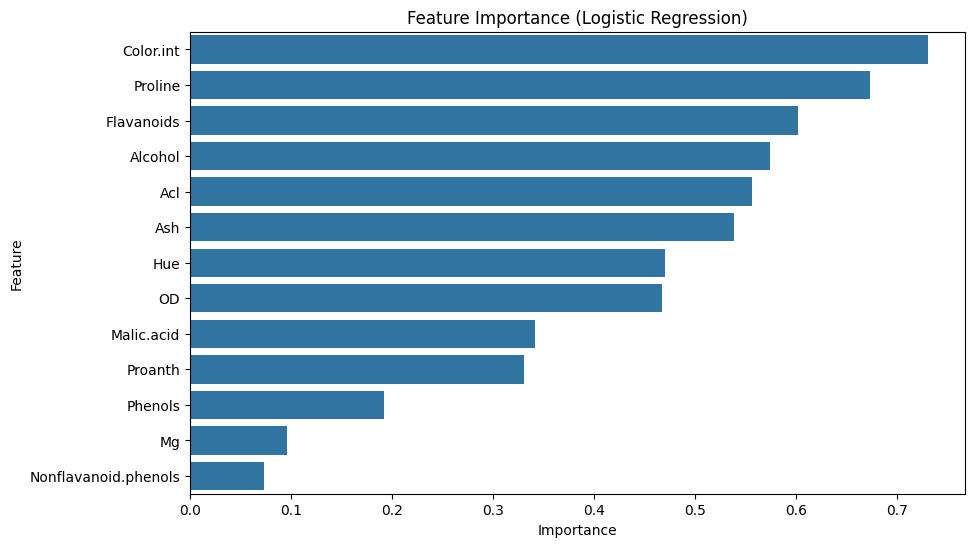

In [31]:
importance_log = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(model.coef_), axis=0)
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_log)
plt.title("Feature Importance (Logistic Regression)")
plt.show()


The bar plot above shows the importance of each feature in the Logistic Regression model. Feature importance is calculated as the average absolute value of the model's coefficients across all classes, reflecting how strongly each chemical property influences the prediction.

Features with larger coefficients have a greater impact on determining the wine class. From the plot, we can see that color_intensity, prolines and flavanoids are among the most influential features. This aligns with earlier observations from the correlation analysis and scatter plots, confirming that these chemical properties are key in differentiating wine types.

Conversely, features with smaller coefficients contribute less to the model's predictions and may have a minor effect on classification. Logistic Regression's feature importance provides a direct and interpretable measure of which attributes drive the decision-making process in the model.

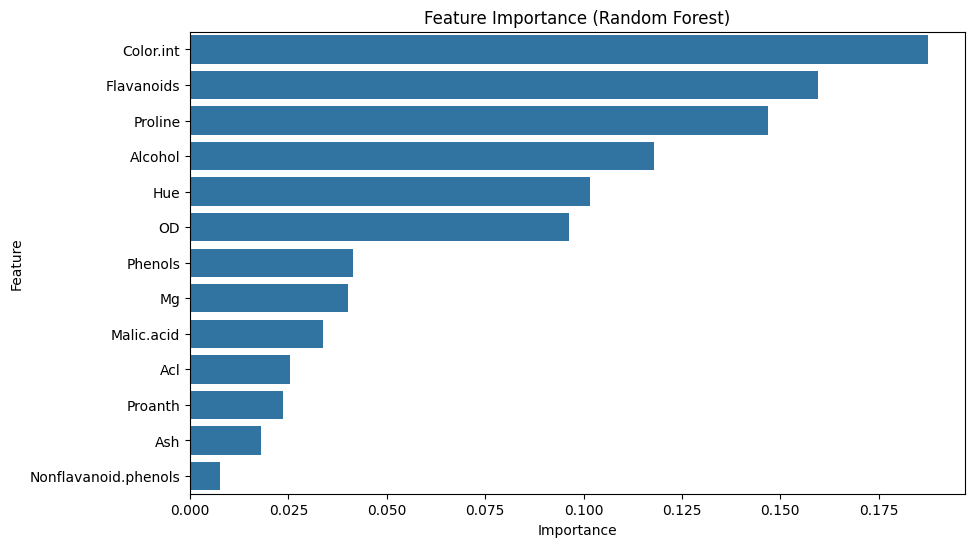

In [32]:
importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_rf)
plt.title("Feature Importance (Random Forest)")
plt.show()


The bar plot above shows the feature importance scores derived from the Random Forest model. In a Random Forest, feature importance reflects how much each feature contributes to reducing impurity across all the decision trees in the ensemble. Features that consistently help split the data effectively across multiple trees receive higher importance scores.

Similar to logistic regression plot, we can see that color_intensity, prolines and flavanoids are the most influential features in predicting wine classes. This aligns closely with our earlier correlation analysis, confirming that these chemical properties are key differentiators between wine types.

Features with lower importance scores contribute less to the model's decisions, though they may still provide supporting information. Overall, this visualization highlights which attributes the Random Forest relies on most to achieve its perfect classification performance.

In this project, the Wine dataset was explored and two classification algorithms were applied which are Logistic Regression and Random Forest, to predict wine types based on their chemical properties.

During data exploration, we observed that several features such as **flavanoids, color intensity, and od280/od315** of diluted wines showed clear separation across classes. This suggested that these chemical attributes would be highly informative for classification.

After preprocessing (including feature scaling and train-test splitting), both models were trained and evaluated. The **Random Forest classifier** outperformed **Logistic Regression** in terms of overall accuracy and F1-score, indicating that it captured nonlinear relationships more effectively. Logistic Regression, while slightly less accurate, provided interpretable coefficients that helped us understand feature influence more transparently.

## Challenges

Some challenges included ensuring all features were on a similar scale (important for Logistic Regression) and interpreting feature importances across different model types. Additionally, given the relatively small dataset (178 samples), performance metrics could vary with different train-test splits.

## Future improvements could include:

* Hyperparameter tuning using Grid Search or Random Search to optimize model performance.

* Cross-validation to obtain more robust evaluation metrics.

* Exploring other algorithms such as Support Vector Machines or k-Nearest Neighbors for comparison.

* Applying Principal Component Analysis (PCA) to visualize high-dimensional feature relationships.

## Conclusion

Overall, both models performed well, with Random Forest achieving the best accuracy. The project demonstrated how classical machine learning models can effectively classify wines based on their chemical composition, and how understanding feature importance provides meaningful insights into the characteristics that differentiate wine types.